In [2]:
#Import Libraries
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm

**1. Summarized Density with Histogram**

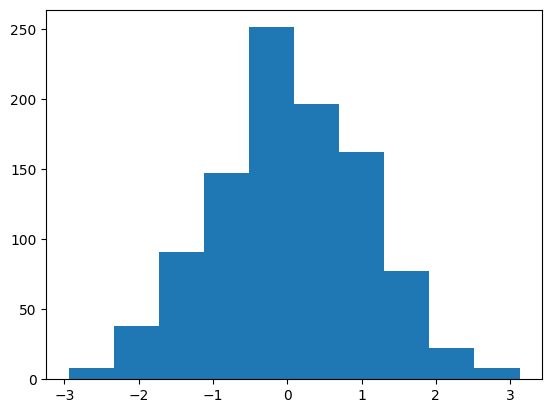

In [4]:
sample = normal(size=1000)
pyplot.hist(sample, bins=10)
pyplot.show()

**2.Parametric Density Function**

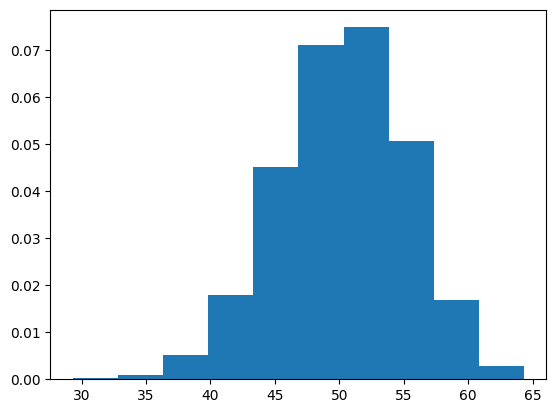

In [11]:
sample = normal(loc=50, scale=5, size=1000)
sample
pyplot.hist(sample,bins=10, density=True)
pyplot.show()

Calculate Parameters

In [12]:
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean=%.3f, standard deviation =%.3f'%(sample_mean,sample_std))

Mean=50.216, standard deviation =5.003


Define the Distribution

In [13]:
dist = norm(sample_mean, sample_std)
dist

Sample probability for range of outcomes

In [14]:
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
probabilities

[2.270120842197844e-05,
 4.990516519679876e-05,
 0.00010541221688853887,
 0.00021393671562078517,
 0.0004171849466334722,
 0.0007816653526942838,
 0.001407220078624304,
 0.0024341767606035616,
 0.00404567627276443,
 0.006460692526633685,
 0.009913247408351783,
 0.014615098454147395,
 0.020703152127104815,
 0.028178646522478645,
 0.036851291510418646,
 0.04630567556335225,
 0.05590680377263418,
 0.06485508478472543,
 0.07228901824164377,
 0.07741935516285682,
 0.07966649320662425,
 0.07876817429594239,
 0.07482983473804058,
 0.06830424899092058,
 0.05990589803984986,
 0.050482444122402687,
 0.04087521888973204,
 0.03180011842570926,
 0.023770937554618374,
 0.01707311685705758,
 0.011782250242036359,
 0.007812546222945407,
 0.004977438298960083,
 0.003046969439181611,
 0.0017921701491647032,
 0.001012836417000238,
 0.0005499817834109398,
 0.0002869500003193452,
 0.00014385106516724334,
 6.92897289380687e-05]

Plot histogram and PDF

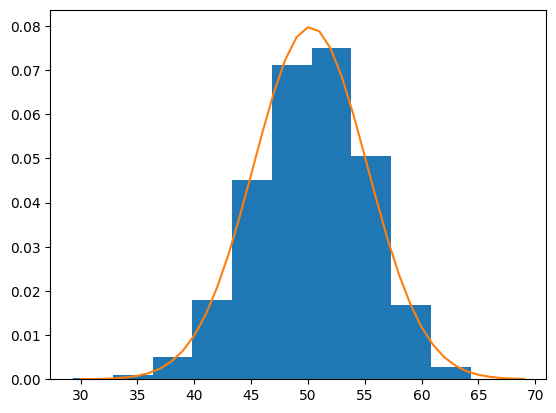

In [15]:
pyplot.hist(sample, bins=10, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

**3. Non-Parametric Density Function**

In [16]:
#importing libraries
from  numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity

Generate a Sample

In [17]:
Sample1 = normal(loc=20, scale=5, size=300)
Sample2 = normal(loc=40, scale=5, size=700)
Sample = hstack((Sample1, Sample2))
Sample

array([20.74424839, 26.09800139, 19.33534689, 20.3685424 , 21.71368787,
       20.08946543, 23.83129478, 26.17611047, 13.3643807 , 25.1619717 ,
       17.81791545, 20.7278941 , 14.84652658, 22.5814785 , 20.89874215,
       29.3178725 , 20.88437141, 13.86524802, 24.43946828, 15.79517814,
       21.60486227, 20.10053441, 21.33338491, 12.50717483, 18.04961538,
       27.27832869, 26.36703552, 11.70487172, 27.52589923, 23.26287803,
       23.16913922, 13.02732588, 12.8565788 , 13.78605042, 26.6716164 ,
       16.03831471, 24.72749099, 24.46797959, 16.48787343, 28.71027193,
       31.79199889, 28.46420609, 20.7742123 , 17.17256259, 24.90601955,
       20.5166393 , 24.77208282, 13.73181543, 16.00564229, 14.31782733,
       22.70606435, 14.38381302, 25.52724851, 17.54883663, 16.59108731,
       19.61458481, 10.29000707, 16.54119986, 19.080016  , 18.81440099,
       21.1018245 , 24.87467358, 20.24033842, 17.35903399, 24.13273281,
       16.32973506, 11.98449162, 24.78891327, 17.10246958, 20.46

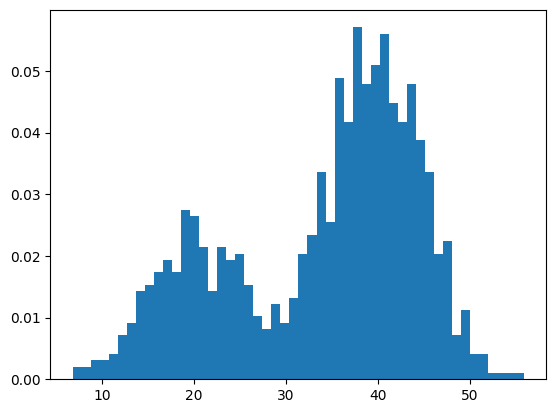

In [18]:
pyplot.hist(Sample, bins=50, density=True)
pyplot.show()

Fit Density

In [20]:
model = KernelDensity(bandwidth=3, kernel = 'gaussian')
Sample = Sample.reshape((len(Sample), 1))
model.fit(Sample)

KernelDensity(bandwidth=3)

Sample probability for a range of Outcomes

In [21]:
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
probabilities

array([6.37996362e-05, 1.32487167e-04, 2.53431729e-04, 4.49631136e-04,
       7.46080560e-04, 1.16904816e-03, 1.74739695e-03, 2.51450582e-03,
       3.50675701e-03, 4.75499162e-03, 6.27014673e-03, 8.03018175e-03,
       9.97635029e-03, 1.20205709e-02, 1.40575100e-02, 1.59735068e-02,
       1.76516147e-02, 1.89798223e-02, 1.98681506e-02, 2.02697192e-02,
       2.01924570e-02, 1.96930028e-02, 1.88599054e-02, 1.78036496e-02,
       1.66637211e-02, 1.56234172e-02, 1.49105828e-02, 1.47696981e-02,
       1.54114101e-02, 1.69617190e-02, 1.94325247e-02, 2.27206727e-02,
       2.66266941e-02, 3.08790954e-02, 3.51577024e-02, 3.91209436e-02,
       4.24440970e-02, 4.48647109e-02, 4.62180962e-02, 4.64447931e-02,
       4.55673562e-02, 4.36543030e-02, 4.07973920e-02, 3.71164509e-02,
       3.27823925e-02, 2.80327428e-02, 2.31581668e-02, 1.84591718e-02,
       1.41923302e-02, 1.05303043e-02, 7.54893456e-03, 5.23885616e-03,
       3.53013496e-03, 2.31912993e-03, 1.49195353e-03, 9.42497300e-04,
      

Plot Histogram and PDF

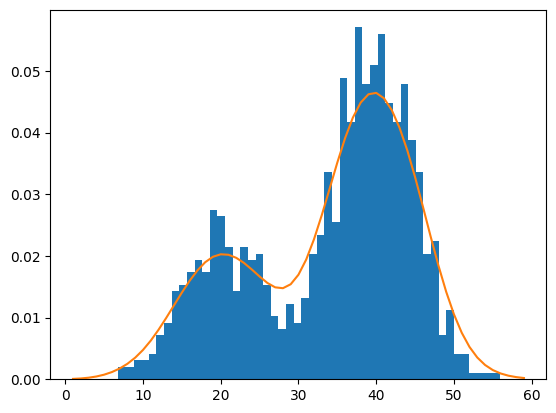

In [22]:
pyplot.hist(Sample, bins=50, density=True)
pyplot.plot(values[:],probabilities)
pyplot.show()